This notebook generates Figure 5C.

In [1]:
import anndata
import scvi
import scanpy as sc
import numpy as np
import pandas as pd
import sc_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sc.set_figure_params(figsize=(12, 12))

/home/kjs6397/.conda/envs/pasc_revisions_venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import sys
path = os.getcwd()
sys.path.insert(0, "../../lib")
import sankey

In [3]:
DIR = "/projects/b1038/Pulmonary/ksenkow/Long_COVID_official/data/figures/fig_5"

In [4]:
mpl.font_manager.fontManager.addfont(f"/projects/b1038/Pulmonary/nmarkov/2022-script-atlas/code//fonts/Arial.ttf")
        
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.family"] = "Arial"

## Fig. 5C: Sankey of cluster mapping between Bailey and new labels projected from Reyfman
Left column - cluster labels from Bailey et al. (MoAM-1, MoAM-2, etc). 

Right column - cluster labels projected from reannotated Reyfman (MP1, MP2, etc). 

Middle column - label transfer uncertainly scores per cell - this middle column will serve as a heatmap of how confident those predictions are.

### Import Bailey object

In [5]:
bailey = sc.read_h5ad('/projects/b1038/Pulmonary/cpuritz/PASC/data/01BAL/raw/adata_raw_final.h5ad')

### Import Reyfman projected on Bailey

In [6]:
reyf_on_bailey = sc.read_h5ad('../../data/21scArches/reyfman_on_PASC/reyfman_on_PASC.h5ad')

In [7]:
rename_map = {'MoAM-1': 'MP1', 
              'MoAM-2': 'MP2',
              'TRAM-1': 'MP3',
              'TRAM-2': 'MP4',
              'TRAM-3': 'MP5',
              'Perivascular MoAM': 'MP6'
             }

reyf_on_bailey.obs['cell_type_pred'] = reyf_on_bailey.obs['cell_type_pred'].map(rename_map).fillna(reyf_on_bailey.obs['cell_type_pred'])

### Subset on common cells

In [8]:
common_indices = bailey.obs.index.intersection(reyf_on_bailey.obs.index)

bailey = bailey[common_indices, :]
reyf_on_bailey = reyf_on_bailey[common_indices, :]

### Create one dataframe

In [9]:
bailey.obs = bailey.obs[['cell_type']]
reyf_on_bailey.obs = reyf_on_bailey.obs[['cell_type_uncertainty', 'cell_type_pred']]

In [10]:
sankey_df = pd.merge(bailey.obs, reyf_on_bailey.obs, left_index=True, right_index=True)

In [11]:
sankey_df = sankey_df[(sankey_df.cell_type_pred.isin(['MP1', 'MP2', 'MP3', 'MP4', 'MP5', 'MP6'])) &
                     (sankey_df.cell_type.isin(['MoAM-1', 'MoAM-2', 'MoAM-3', 'MoAM-4',
                                               'TRAM-1', 'TRAM-2', 'TRAM-3', 'TRAM-4',
                                               'TRAM-5', 'Perivascular macrophages', 'Proliferating macrophages']))]

In [12]:
sankey_df['cell_type'] = sankey_df['cell_type'].replace({'Perivascular macrophages': 'Periv. MPs',
                 'Proliferating macrophages': 'Prolif. MPs'})

### Plot sankey

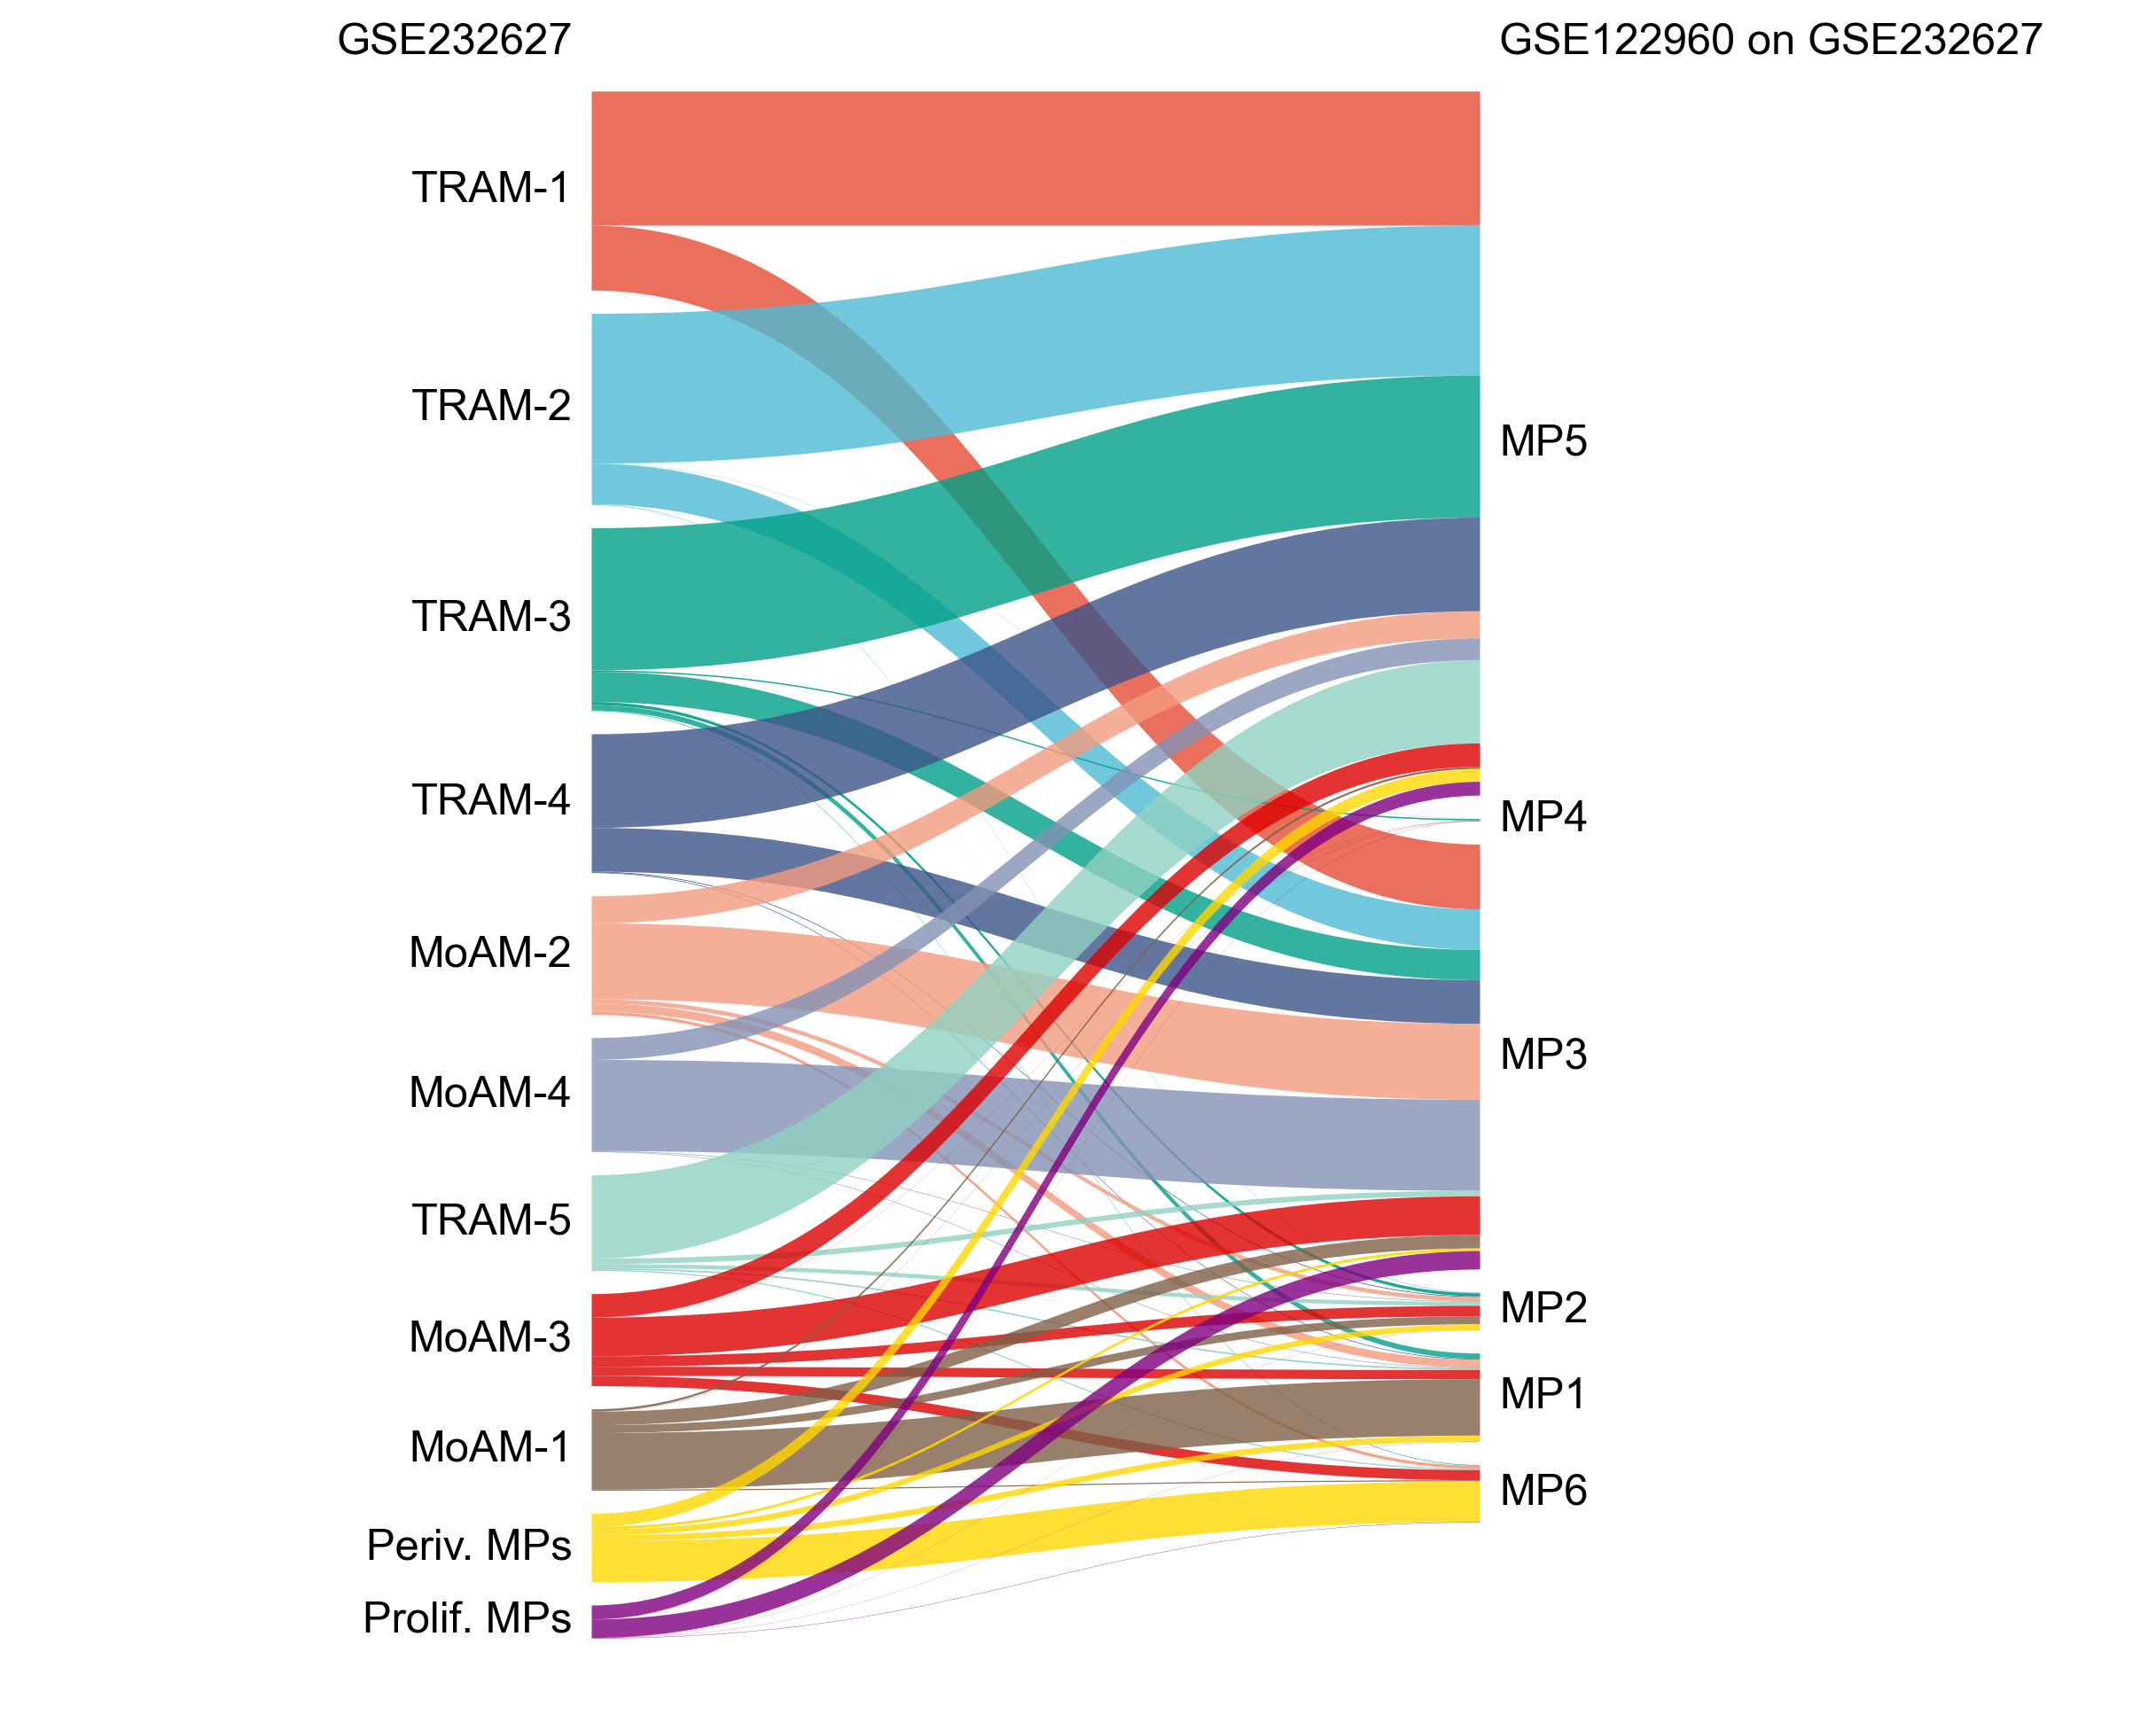

In [13]:
import importlib
import sankey
importlib.reload(sankey)
mpl.rcParams["figure.figsize"] = (15, 12)
fig = sankey.sankey(sankey_df.cell_type,
              sankey_df.cell_type_pred, title_left="GSE232627", title_right="GSE122960 on GSE232627", fontsize=22);

fig.savefig(f"{DIR}/fig5c-revised.png", bbox_inches='tight')
fig.savefig(f"{DIR}/fig5c-revised.pdf", bbox_inches='tight')